In [1]:
###############################################################################
# The Institute for the Design of Advanced Energy Systems Integrated Platform
# Framework (IDAES IP) was produced under the DOE Institute for the
# Design of Advanced Energy Systems (IDAES).
#
# Copyright (c) 2018-2023 by the software owners: The Regents of the
# University of California, through Lawrence Berkeley National Laboratory,
# National Technology & Engineering Solutions of Sandia, LLC, Carnegie Mellon
# University, West Virginia University Research Corporation, et al.
# All rights reserved.  Please see the files COPYRIGHT.md and LICENSE.md
# for full copyright and license information.
###############################################################################

# PySMO Tutorial
Author: Mayo Amusat  
Maintainer: Mayo Amusat  
Updated: 2023-06-01  

**Python-based Surrogate Modelling Objects** (PySMO) provides tools for generating different types of reduced order models. PySMO currently provides tools for sampling and surrogate model generation.

## Installation

**PySMO** is installed by default as part of IDAES. For instructions on installing IDAES, see the [online documentation](https://idaes-pse.readthedocs.io/en/stable/).

## One-Shot Sampling with PySMO

The PySMO package offers five common sampling methods for one-shot design:

* Latin Hypercube Sampling (LHS)
* Full-Factorial Sampling
* Halton Sampling
* Hammersley Sampling
* Centroidal voronoi tessellation (CVT) sampling

PySMO provides two modes for data sampling: creation and selection.
- In creation mode, PySMO creates a specified number of sample points from the bounds provided by the user.
- In selection mode, PySMO selects a specified number of data points from a user-supplied dataset or file.

### Generating samples: 
For demonstration purposes, let us consider a problem for which we need twenty-five (25) samples of temperature and pressure from within the ranges T = 273K - 373K, P = 1 MPa - 50 MPa. Let us generate these samples in PySMO.

#### Step 1: Import PySMO's sampling tool
For this demonstration, we will attempt to generate the samples using the Hammersley sampling method.

In [2]:
from idaes.core.surrogate.pysmo.sampling import HammersleySampling

#### Step 2: Specify sampling information and initialize class

All the sampling tools (except full-factorial sampling) require the same keyword arguments:

          -  data_input             : must be a list of lists containing the problem bounds (when creating points), 
                                      or an input dataset (when selecting points from a dataset)
          -  number_of_samples      : number of samples to be created or selected.
          -  sampling_type          : "creation" or "selection".

For full factorial sampling, the user needs to enter a list of points in each dimension in place of the number of samples. Full-factorial sampling requires other inputs - details may be found in the [documentation](https://idaes-pse.readthedocs.io/en/stable/explanations/modeling_extensions/surrogate/sampling/pysmo_uniform.html).

For our example, we will create the bounds and then initialize the class with the number of samples.

In [3]:
bounds_info = [[273, 1], [373, 50]]
init_data = HammersleySampling(
    data_input=bounds_info, number_of_samples=25, sampling_type="creation"
)

Sampling type:  creation 



#### Step 3: Create the samples
The samples are created by calling the ``sample_points`` method on the initialized class.

In [4]:
samples = init_data.sample_points()
print(samples)

[[273.        1.     ]
 [277.       25.5    ]
 [281.       13.25   ]
 [285.       37.75   ]
 [289.        7.125  ]
 [293.       31.625  ]
 [297.       19.375  ]
 [301.       43.875  ]
 [305.        4.0625 ]
 [309.       28.5625 ]
 [313.       16.3125 ]
 [317.       40.8125 ]
 [321.       10.1875 ]
 [325.       34.6875 ]
 [329.       22.4375 ]
 [333.       46.9375 ]
 [337.        2.53125]
 [341.       27.03125]
 [345.       14.78125]
 [349.       39.28125]
 [353.        8.65625]
 [357.       33.15625]
 [361.       20.90625]
 [365.       45.40625]
 [369.        5.59375]]


Simple as that, the samples have been created!

Now, let us visualize the samples in a 2-D plot.

#### Step 4: Visualize samples with matplotlib

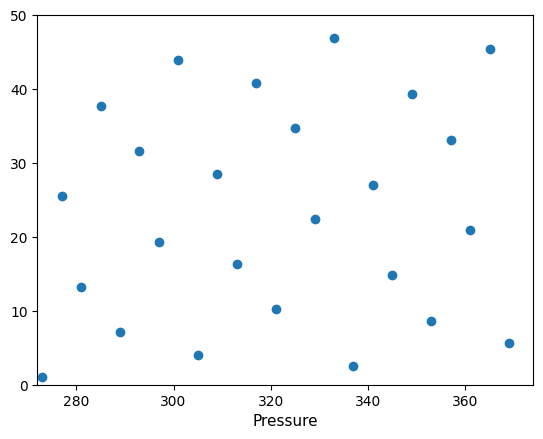

In [5]:
from matplotlib import pyplot as plt

plt.plot(samples[:, 0], samples[:, 1], "o")
plt.xlabel(r"Temperature", fontsize=11)
plt.xlabel(r"Pressure", fontsize=11)
plt.xlim(272, 374)
plt.ylim(0, 50)
plt.show()

## Generating surrogates with PySMO

PySMO currently provides tools for generating three types of surrogates:

- Polynomial surrogates
- Radial basis function (RBF) surrogates, and
- Kriging surrogates

Details about thee various methods may be found in the [documentation](https://idaes-pse.readthedocs.io/en/stable/explanations/modeling_extensions/surrogate/api/pysmo/).

### Generating polynomial models

The ``PolynomialRegression`` class trains polynomial models from data.

As an example, let us generate a surrogate for the Brainin function. 

The true Brainin function is given by the expression:
 
 \begin{gather}
\hat{y}(x_{1},x_{2})=\left(x_{2}-\frac{5.1x_{1}^{2}}{4\pi^{2}}+\frac{5x_{1}}{\pi}-6\right)^{2}+10\left[\left(1-\frac{1}{8\pi}\right)\cos\left(x_{1}\right)+1\right]+5x_{1}\nonumber \\
x_{1}\in\left[-5,10\right];x_{2}\in\left[0,15\right]
\end{gather}

We have generated 30 points from the function and saved the information in a text file called "brainin_30.txt". We will use this data to train a simple polynomial model. The data is in XY format, with the outputs $y$ in the third column.

#### Step 1: Import and visualize the data

In [6]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
print(brainin_data, "\n\nDataset shape:", brainin_data.shape)

[[ 3.15107413e+00  4.17554078e+00  4.03815759e+00]
 [ 1.36776386e+00  1.26716420e+01  8.60127077e+01]
 [-4.92921716e+00  1.82353681e+00  2.41888089e+02]
 [ 5.06123627e+00  1.23877913e+01  1.37242426e+02]
 [-2.94940115e+00  8.62639994e+00  1.07587601e+01]
 [ 8.36982931e+00  3.13803183e+00  7.24964869e+00]
 [-2.22007671e+00  1.62565336e+00  7.71988248e+01]
 [-1.70453761e+00  1.46793568e+01  3.99820398e+01]
 [ 7.17524724e+00  2.57911519e+00  1.78453527e+01]
 [ 7.24337123e+00  4.11110621e+00  2.36937839e+01]
 [ 1.47556275e+00  1.41004473e+01  1.14292050e+02]
 [ 7.26474068e+00  5.04167925e+00  2.96703147e+01]
 [-2.36884319e+00  5.59248069e+00  2.71582680e+01]
 [-4.91467239e+00  3.78639530e+00  1.84993457e+02]
 [ 6.93493763e+00  2.28824569e-01  1.85302363e+01]
 [ 3.98265065e+00  9.05706809e+00  5.75698037e+01]
 [-3.42278472e+00  5.72915167e+00  5.30702398e+01]
 [-4.45285915e+00  1.33561735e+01  1.27882794e+01]
 [ 9.71381286e+00  8.99129832e-01  4.14567857e+00]
 [ 8.35818917e+00  8.65352249e+

Let us visualize the data:

C:\Users\dkgun\AppData\Local\Temp\ipykernel_31700\142152307.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(


Text(0.5, 0, '$y$')

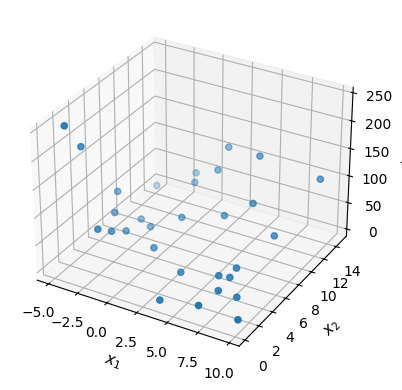

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(6, 4), tight_layout=True)
ax = fig1.add_subplot(111, projection="3d")
ax.scatter3D(
    brainin_data[:, 0], brainin_data[:, 1], brainin_data[:, 2], cmap=brainin_data[:, 2]
)
ax.set_xlabel(r"$x_{1}$", fontsize=11)
ax.set_ylabel(r"$x_{2}$", fontsize=11)
ax.set_zlabel(r"$y$", fontsize=11)

#### Step 2: Import the polynomial model tool

In [8]:
from idaes.core.surrogate.pysmo.polynomial_regression import PolynomialRegression

#### Step 3: Specify the regression settings and initialize the PolynomialRegression class
    
The PolynomialRegression class takes a keyword arguments:

      -  original_data_input           : The dataset for regression training. training_data is expected to contain xy_data, 
                                         with the output values (y) in the last column.
      -  regression_data_input         : same as above
      -  maximum_polynomial_order      : maximum order of the polynomial to be generated  

It also takes a number of optional arguments:

      - multinomials                  : True/False option for specifying second-order bi-variate terms. default is False
      - training_split                : The training/cross-validation split of training data. Must be between 0 and 1. 
                                        Default is 0.75
      - fname                         : Filename for saving results (.pickle extension). 
      - overwrite                     : Option determining whether any existing file with the same name supplied in 'fname'  
                                        should be overwritten.

For this example, let us consider a 4th order polynomial with interaction terms. We will split the data 80/20 betweeen training and cross-validation.

In [9]:
poly_class = PolynomialRegression(
    original_data_input=brainin_data,
    regression_data_input=brainin_data,
    maximum_polynomial_order=4,
    multinomials=1,
    training_split=0.8,
    number_of_crossvalidations=10,
    overwrite=True,
)


===========================Polynomial Regression===============================================


No iterations will be run.
Default parameter estimation method is used.
Parameter estimation method:  pyomo 



#### Step 4: Extract variable names
Next, we extract Pyomo variable names from the dataset. This should be done always.

In [10]:
vars = poly_class.get_feature_vector()

We can view the variables using Pyomo's pprint function:

In [11]:
vars.pprint()

IndexedParam : Size=2, Index={0, 1}, Domain=Any, Default=None, Mutable=True
    Key : Value
      0 :     0
      1 :     0


#### Step 5: Specify additional regression terms, if required.

This is one of the unique features of PySMO -  it allows the user to specify additional regression features if they want.
The additional features must be specified in terms of the Pyomo variables created when calling the ``get_feature_vector()`` 

For this example, let us create three additional features: $x_{1}^{2}x_{2}^{2}$, $exp(x_1)$ and $exp(x_2)$. We do this by calling the ``set_additional_terms`` function:

In [12]:
from pyomo.environ import exp

poly_class.set_additional_terms(
    [vars[0] * vars[0] * vars[1] * vars[1], exp(vars[0]), exp(vars[1])]
)

That's it - those features will now exist in the model. 

Note that ``set_additional_terms`` an optional call - the regression process works just fine without it.

#### Step 6: Train the surrogate and view results
Next, we train the polynomial surrogate by calling ``training``:

In [13]:
poly_class.training()

No iterations will be run.



Best surrogate model is of order 3  with a cross-val S.S. Error  of 19.737617

------------------------------------------------------------
The final coefficients of the regression terms are: 

k               | 57.607003
(x_ 1 )^ 1      | -19.078561
(x_ 2 )^ 1      | -17.191563
(x_ 1 )^ 2      | 3.889924
(x_ 2 )^ 2      | 1.163328
(x_ 1 )^ 3      | -0.351928
(x_ 2 )^ 3      | 0.018398
x_ 1 .x_ 2      | 3.100135

The coefficients of the extra terms in additional_regression_features are:

Coeff. additional_regression_features[ 1 ]:  -0.017933
Coeff. additional_regression_features[ 2 ]:  0.004746
Coeff. additional_regression_features[ 3 ]:  -1.3e-05

Regression model performance on training data:
Order:  3  / MAE: 6.154513  / MSE: 65.995248  / R^2: 0.978531

Results saved in  solution.pickle



Results of polynomial regression run:

Polynomial order                   : 3
Number of terms in polynomial model: 11

Polynomial Expression:
--------------------------

57.60700349249289 - 19.078560846595344*IndexedParam[0] - 17.191563035875806*IndexedParam[1] + 3.8899241750021663*IndexedParam[0]**2 + 1.1633280319958954*IndexedParam[1]**2 - 0.3519284134546862*IndexedParam[0]**3 + 0.018398180902055014*IndexedParam[1]**3 + 3.1001348356698335*(IndexedParam[1]*IndexedParam[0]) - 0.017933037213866673*(IndexedParam[0]*IndexedParam[0]*IndexedParam[1]*IndexedParam[1]) + 0.00474571104342994*exp(IndexedParam[0]) - 1.2975320261052192e-05*exp(IndexedParam[1])
--------------------------

Model training errors:
-----------------------
Mean Squared Error (MSE)         : 65.99524781717177
Root Mean Squared Error (RMSE)   : 8.123745922736122
Mean Absolute error (MSE)        : 6.154513199255071
Goodness of fit (R2)             : 0.97853053384543


The polynomial model seems to fit well based on the $R^2$. It should be noted that the metrics are only an indication of how well of how well the model fit the training data - the user needs to verify the model's performance on a test data set if possible.

We can view the parity and residual plots for the fit:

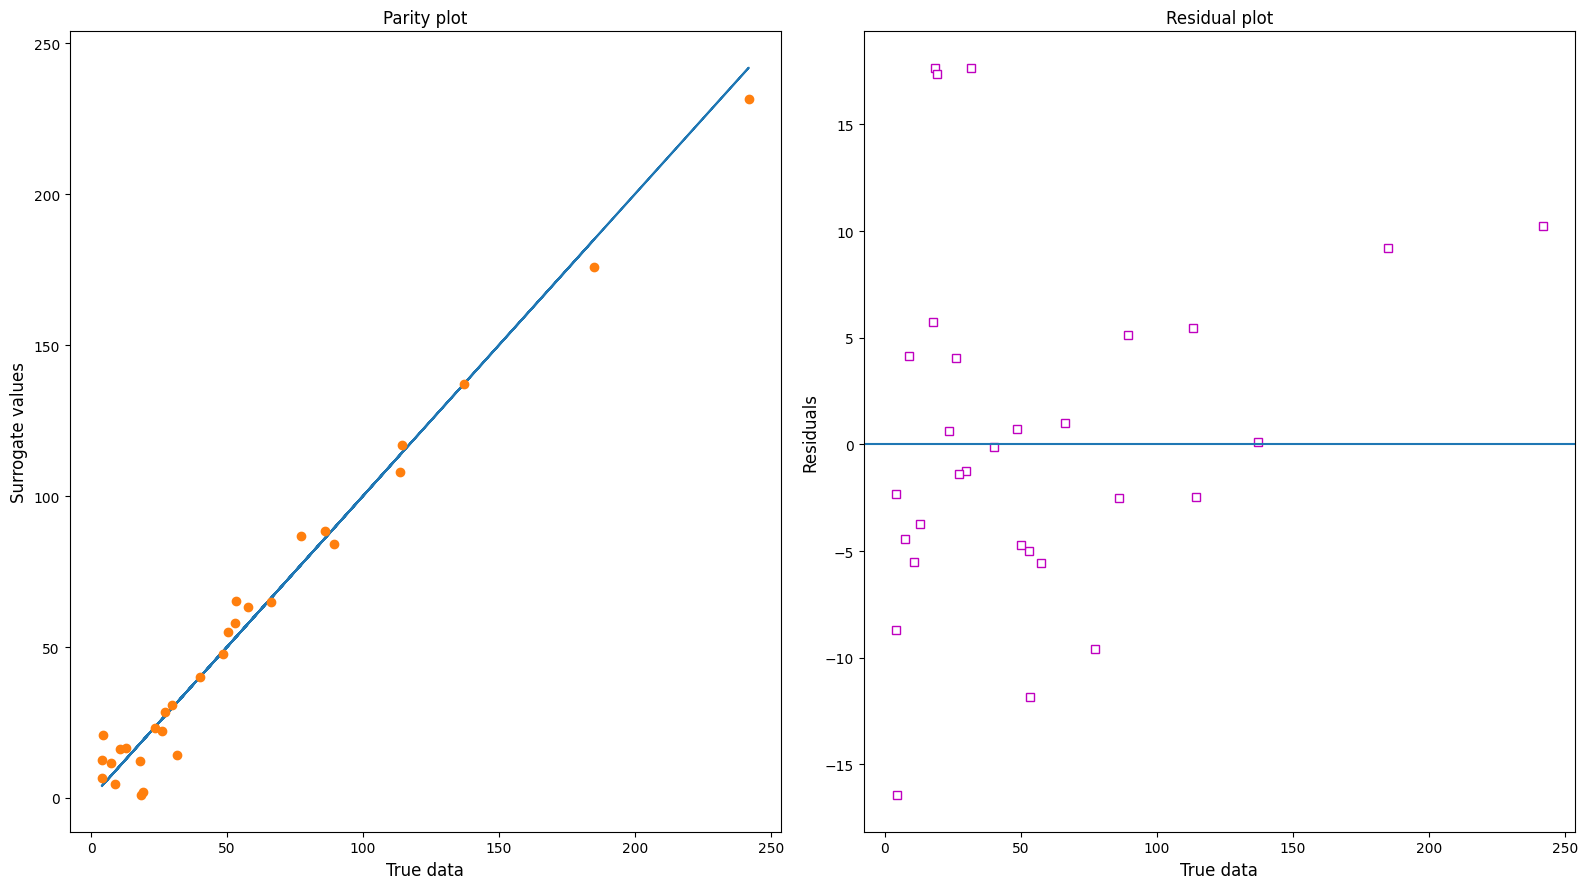

In [14]:
poly_class.parity_residual_plots()

PySMO is also able to compute the confidence intervals on the regression coefficients obtained by calling ``confint_regression()``. This is left as an exercise for the user.

#### Step 8 (Optional): Generate Pyomo expression 

If the user wishes, they can generate the Pyomo expression for the polynomial fit using PySMO's ``generate_expression``. To do this, the user must pass in a list of Pyomo variables corresponding to each variable in the input dataset. 

As a demonstration, let us create the variables $x_1$ and $x_2$ and generate the pyomo expression based on them:

In [15]:
from pyomo.environ import Var, ConcreteModel

m = ConcreteModel()
m.x = Var([1, 2])
print(poly_class.generate_expression([m.x[1], m.x[2]]))

57.60700349249289 - 19.078560846595344*x[1] - 17.191563035875806*x[2] + 3.8899241750021663*x[1]**2 + 1.1633280319958954*x[2]**2 - 0.3519284134546862*x[1]**3 + 0.018398180902055014*x[2]**3 + 3.1001348356698335*(x[2]*x[1]) - 0.017933037213866673*(x[1]*x[1]*x[2]*x[2]) + 0.00474571104342994*exp(x[1]) - 1.2975320261052192e-05*exp(x[2])


#### Step 9 (Optional): Predict output at any unsampled point

Based on the model we trained, we can predict the surrogate value at any previously unsampled point. 

Let us evaluate the surrogate at three points:

- $x_{1}=5$, $x_{2}=8$ (true function value: 57.9908)
- $x_{1}=-3$, $x_{2}=10$ (true function value: 4.2461)
- $x_{1}=-2$, $x_{2}=3$. (true function value: 50.8899)

We will pass the points in as an array.

In [16]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = poly_class.predict_output(unsampled_points)
print(ys)

[[57.7897913 ]
 [12.74008178]
 [54.28524655]]


The model performs fairly well in predicting the value at two of our sampled points but is off on the value at [-3, 2]. For better model performance, additional training data is needed in this region. We will leave this to the user to try.

Further information about using PySMO's polynomial regression tool can be found in the [documentation](https://idaes-pse.readthedocs.io/en/stable/explanations/modeling_extensions/surrogate/api/pysmo/pysmo_polyregression.html).

### Generating RBF models

The ``RadialBasisFunction`` class trains RBF models from data. For details about RBF models, the user should consult the documentation.

As an example, we will again consider the Brainin function. The same dataset loaded previously will be used.

#### Step 1: Import the data and the RBF tool

In [17]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
from idaes.core.surrogate.pysmo.radial_basis_function import RadialBasisFunctions

#### Step 2: Specify the RBF settings and initialize the RadialBasisFunctions class
    
The RadialBasisFunctions class takes a number of keyword arguments:

      -  XY_data                       : The dataset forRBF training. training_data is expected to contain xy_data, 
                                         with the output values (y) in the last column.


It also takes a number of optional arguments:

      -  regularization                : Boolean variable determining whether regularization is done. Default is True.
      -  basis_function                : Basis function transformation to be applied to the training data. PySMO offers 
                                         six basis function types including the Gaussian and Spline transformations. User 
                                         should consult documentation for full list of options.   
      -  fname                         : Filename for saving (.pickle extension)
      - overwrite                      : Option determining whether any existing file with the same name supplied in 'fname'  
                                         should be overwritten.

For this demonstration, we will train an RBF model with a Gaussian basis function:

In [18]:
rbf_class = RadialBasisFunctions(
    XY_data=brainin_data, basis_function="gaussian", overwrite=True
)


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  True


#### Step 3: Extract variable names
Next, we extract Pyomo variable names from the dataset.

In [19]:
vars = rbf_class.get_feature_vector()

#### Step 4: Train the RBF surrogate
Next, we train the RBF surrogate by calling ``training``:

In [20]:
rbf_class.training()

0.001    |     1e-05    |     1.330188999805357    |     7.936658808585865e+18    |     1762.2922695772181    |     2999999.7996930624    |     6.661337702980191e-10
0.001    |     2e-05    |     1.3231321486358596    |     7.936658808585865e+18    |     1762.2922695772181    |     1500000.3998815753    |     3.3306699617909336e-10
0.001    |     5e-05    |     1.3204882439270513    |     7.936658808585865e+18    |     1762.2922695772181    |     600000.7598810853    |     1.3322693168251415e-10
0.001    |     7.5e-05    |     1.3203184940690464    |     7.936658808585865e+18    |     1762.2922695772181    |     400000.83992750663    |     8.88180284713839e-11
0.001    |     0.0001    |     1.3203209127587061    |     7.936658808585865e+18    |     1762.2922695772181    |     300000.87994025816    |     6.661357686349637e-11
0.001    |     0.0002    |     1.320453829126744    |     7.936658808585865e+18    |     1762.2922695772181    |     150000.93996799184    |     3.330689945357609e

0.075    |     0.005    |     1.3829509021399737    |     2.5655434447895905e+18    |     569.6650806163085    |     5987.520681298484    |     1.3294966641593762e-12
0.075    |     0.0075    |     1.3758254841268682    |     2.5655434447895905e+18    |     569.6650806163085    |     3992.013787532067    |     8.864051243078357e-13
0.075    |     0.01    |     1.3694975238618983    |     2.5655434447895905e+18    |     569.6650806163085    |     2994.2603406490575    |     6.648593543821096e-13
0.075    |     0.02    |     1.3518655278680678    |     2.5655434447895905e+18    |     569.6650806163085    |     1497.630170324489    |     3.325406994935085e-13
0.075    |     0.05    |     1.3317271553627905    |     2.5655434447895905e+18    |     569.6650806163085    |     599.6520681297745    |     1.3314950656035374e-13
0.075    |     0.075    |     1.3262949589526654    |     2.5655434447895905e+18    |     569.6650806163085    |     400.1013787531858    |     8.884035257521146e-14
0.0

10.0    |     1e-05    |     1.4570968886841438    |     19.17586490054359    |     4.257897345936976e-15    |     19.174489304841284    |     4.257591902332721e-15
10.0    |     2e-05    |     1.4570993187331154    |     19.17586490054359    |     4.257897345936976e-15    |     19.173113917340388    |     4.257286504958466e-15
10.0    |     5e-05    |     1.4571066086154152    |     19.17586490054359    |     4.257897345936976e-15    |     19.168989003573486    |     4.256370590110744e-15
10.0    |     7.5e-05    |     1.4571126832141397    |     19.17586490054359    |     4.257897345936976e-15    |     19.16555300557406    |     4.255607645292439e-15
10.0    |     0.0001    |     1.457118757537252    |     19.17586490054359    |     4.257897345936976e-15    |     19.162118306915016    |     4.2548449889856545e-15
10.0    |     0.0002    |     1.4571430520739157    |     19.17586490054359    |     4.257897345936976e-15    |     19.148392490952492    |     4.251797245602982e-15
10.0   


Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 0.75
Regularization parameter           : 2e-05
Number of terms in RBF model       : 31

RBF Expression:
--------------------------

4.038157591240296 + 237.8499310618983*(-1551.5244569618876*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084 - 0.5518182560031254)**2 + ((IndexedParam[1] - 0.22882456869508516)/14.45053220191546 - 0.2731190901874679)**2)**0.5)**2) - 334.71891273048857*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084 - 0.4300326512391472)**2 + ((IndexedParam[1] - 0.22882456869508516)/14.45053220191546 - 0.8610629174234938)**2)**0.5)**2) + 235.58220304204985*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084)**2 + ((IndexedParam[1] - 0.22882456869508516)/14.45053220191546 - 0.11035664436222248)**2)**0.5)**2) + 27.886153309561678*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012

#### Step 5: View model metrics
    
We can view the Root Mean Square Error (RMSE) and $R^2$ values of the RBF fit based on the training data:

In [21]:
print("R2: ", rbf_class.R2, "\nRMSE: ", rbf_class.rmse)

R2:  0.9918215668806757 
RMSE:  0.021080345887669095


#### Step 6 (Optional): Generate Pyomo expression output at any unsampled point


Based on the model we trained, we can predict the surrogate value at any previously unsampled point. We do this by calling the function ``predict_output``.

Let us again evaluate the RBF surrogate at the same set of points we considered for the polynomial model:

- $x_{1}=5$, $x_{2}=8$   (true function value: 57.9908)
- $x_{1}=-3$, $x_{2}=10$ (true function value: 4.2461)
- $x_{1}=-2$, $x_{2}=3$  (true function value: 50.8899)

In [22]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = rbf_class.predict_output(unsampled_points)
print(ys)

[[61.06401281]
 [12.7142377 ]
 [50.97501439]]


The results from the RBF surrogate are similar to those obtained from the polynomial.


For RBF models, the Pyomo expression is generated by calling ``generate_expression`` on the results object, while parity plots may be viewed with the ``parity_residual_plots`` method.

Further information about using PySMO's RBF tool and features can be found in the [documentation](https://idaes-pse.readthedocs.io/en/stable/explanations/modeling_extensions/surrogate/api/pysmo/pysmo_radialbasisfunctions.html).

### Training Kriging models

The ``KrigingModel`` class trains Kriging from data. For details about Kriging models, users should consult the documentation.

As an example, we will again consider the Brainin function. The same dataset loaded previously will be used.

#### Step 1: Load the data and import the Kriging tool

In [23]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
from idaes.core.surrogate.pysmo.kriging import KrigingModel

#### Step 2: Specify the Kriging settings and initialize the KrigingModel class
    
The KrigingModel class takes a number of keyword arguments:

      -  XY_data                       : The dataset for Kriging training. training_data is expected to contain xy_data, 
                                         with the output values (y) in the last column.


It also takes a number of optional arguments:

      -  regularization                : Boolean variable determining whether regularization is done. Default is True.
      -  numerical_gradients           : Boolean variable which determines whether numerical gradients are used when
                                         solving the max. likelihood optimization problem. Default is True.
      -  fname                         : Filename for saving (.pickle extension)
      - overwrite                      : Option determining whether any existing file with the same name supplied in 'fname'  
                                         should be overwritten.


For this demonstration, we will train a Kriging model with regularization:

In [24]:
krg_class = KrigingModel(XY_data=brainin_data, overwrite=True)

#### Step 3: Extract variable names (optional)
Next, we extract Pyomo variable names from the dataset.

In [25]:
vars = krg_class.get_feature_vector()

#### Step 4: Train the Kriging surrogate
Next, we train the RBF surrogate by calling ``training``:

In [26]:
krg_class.training()

Optimizing kriging parameters using L-BFGS-B algorithm...



Final results
Theta: [6.01576437 0.22794622] 
Mean: [[386.67466251]] 
Regularization parameter: 1.000000000001e-06

Results saved in  solution.pickle



Results of Kriging run:

Kriging mean                     : [[386.67466251]]
Kriging variance                 : [[70460.78166121]]
Kriging weights                  : [6.01576437 0.22794622]
Regularization parameter         : 1.000000000001e-06
Number of terms in Kriging model : 31

Kriging Expression:
--------------------

386.6746625106164 + (3469.0208871846553*exp(- (6.01576436749808*((IndexedParam[0] + 4.929217157135412)/14.643030012320084 - 0.5518182560031254)**2 + 0.22794621767031822*((IndexedParam[1] - 0.22882456869508516)/14.45053220191546 - 0.2731190901874679)**2)) - 141877.18052533641*exp(- (6.01576436749808*((IndexedParam[0] + 4.929217157135412)/14.643030012320084 - 0.4300326512391472)**2 + 0.22794621767031822*((IndexedParam[1] - 0.22882456869508516)/14.45053220191546 - 0.8610629174234938)**2)) + 89858.53563122451*exp(- (6.01576436749808*((IndexedParam[0] + 4.929217157135412)/14.643030012320084)**2 + 0.22794621767031822*((IndexedParam[1] - 0.22882456869508516)/14.45053220191

The returned information correspond to the Kriging model parameters.

As we can see, the optimization problem was solved using SciPy's L-BFGS algorithm which makes use of gradients. A different algorithm  (Basinhopping) is used when no numerical gradients are computed (when numerical_gradients is set to False). The user should try this.

#### Step 5: View model metrics
    
We can view the RMSE and $R^2$ values of the Kriging fit based on the training data:

In [27]:
print("R2: ", krg_class.training_R2, "\nRMSE: ", krg_class.training_rmse)

R2:  0.999998106078119 
RMSE:  0.07630038686493366


#### Step 6 (Optional): Generate Pyomo expression output at any unsampled point


Again, based on the model we trained, we evaluate the surrogate at a set of  off-design points:

- $x_{1}=5$, $x_{2}=8$   (true function value: 57.9908)
- $x_{1}=-3$, $x_{2}=10$ (true function value: 4.2461)
- $x_{1}=-2$, $x_{2}=3$  (true function value: 50.8899)

We do this by calling the function ``predict_output``:

In [28]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = krg_class.predict_output(unsampled_points)
print(ys)

[[57.63225481]
 [ 4.44461901]
 [50.8024123 ]]


The Kriging model performs very well, predicting all three points fairly accurately. 

For Kriging models, the Pyomo expression is generated by calling ``generate_expression`` on the results object: 

In [29]:
print(krg_class.generate_expression([m.x[1], m.x[2]]))

3469.0208871846553*exp(- (6.01576436749808*((x[1] + 4.929217157135412)/14.643030012320084 - 0.5518182560031254)**2 + 0.22794621767031822*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.2731190901874679)**2)) - 141877.18052533641*exp(- (6.01576436749808*((x[1] + 4.929217157135412)/14.643030012320084 - 0.4300326512391472)**2 + 0.22794621767031822*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.8610629174234938)**2)) + 89858.53563122451*exp(- (6.01576436749808*((x[1] + 4.929217157135412)/14.643030012320084)**2 + 0.22794621767031822*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.11035664436222248)**2)) - 17331.16845172411*exp(- (6.01576436749808*((x[1] + 4.929217157135412)/14.643030012320084 - 0.6822668136056202)**2 + 0.22794621767031822*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.8414199967160326)**2)) + 70866.88925537094*exp(- (6.01576436749808*((x[1] + 4.929217157135412)/14.643030012320084 - 0.13520535030959882)**2 + 0.22794621767031822*((x[2] - 0.22882456869508516)

As we can see, expressing a Kriging model algebraically is pretty complicated!

Parity plots for the Kriging model may be viewed with the ``parity_residual_plots`` method.

Further information about using PySMO's Kriging tool and features can be found in the [documentation](https://idaes-pse.readthedocs.io/en/stable/explanations/modeling_extensions/surrogate/api/pysmo/pysmo_kriging.html).

## Summary

PySMO allows IDAES users to sample design spaces and generate different types of surrogate models. Further information about PySMO's capabilities may be found in the documentation.